분석을 진행중인 과정을 올렸습니다.  
분석이 완료된 데이터들은 plot파일에 올려서 시각화를 완료했습니다.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
'''
data load
순서대로
노드(2153),
평일, 주말, 평일 6~9, 평일 17~20
'''
nodes = pd.read_csv('../data/station(21.01.31).csv')
links = np.load('../raw_data/data_2_weekday.npy', allow_pickle = True)
links_on = np.load('../raw_data/data_2_on.npy', allow_pickle = 1)
links_off = np.load('../raw_data/data_2_off.npy', allow_pickle = 1)

links = np.array([links[:,1],links[:,3]]).T
links1 = np.array([links_on[:,1],links_on[:,3]]).T
links2 = np.array([links_off[:,1],links_off[:,3]]).T

# function

In [125]:
# n 보다 큰 것만 생각하기
def new_links(data, n):
    data = data[data['number'] > n]
    return data

# 시작, 끝, count 만 나타내는 리스트 만들기
def simple_list(data):
    a = np.array([data[:,0],data[:,1]]).T.astype(int)

    item = np.unique(a, return_counts=True, axis = 0)[0]
    count = np.unique(a, return_counts=True, axis = 0)[1]

    return np.column_stack((item, count))

# 좌표로만 나타낸 실제 거리
def haversine(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = location[coord1]
    lat2, lon2 = location[coord2]
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

# 2월달 데이터를 사용한 예제

In [11]:
# simplify links
s_links = simple_list(links)
s_links1 = simple_list(links1)
s_links2 = simple_list(links2)

# all network
G = nx.DiGraph()
G.add_weighted_edges_from(s_links)

# on network
G1 = nx.DiGraph()
G1.add_weighted_edges_from(s_links1)

#off network
G2 = nx.DiGraph()
G2.add_weighted_edges_from(s_links2)

# strength

In [137]:
# add in, out weight to nodes
for u in G.nodes:
    G.nodes[u]['in'] = 0
    G.nodes[u]['out'] = 0
for u in G1.nodes:
    G1.nodes[u]['in'] = 0
    G1.nodes[u]['out'] = 0
for u in G2.nodes:
    G2.nodes[u]['in'] = 0
    G2.nodes[u]['out'] = 0

# calculate weight to nodes
for u, v, weight in G.edges(data="weight"):
    G.nodes[u]['in'] += weight
    G.nodes[v]['out'] += weight
for u, v, weight in G1.edges(data="weight"):
    G1.nodes[u]['in'] += weight
    G1.nodes[v]['out'] += weight
for u, v, weight in G2.edges(data="weight"):
    G2.nodes[u]['in'] += weight
    G2.nodes[v]['out'] += weight

# node weight save. node 순서대로
all_in_weight = []
all_out_weight = []
for i in G.nodes:
    if G.nodes[i]['in'] > 0:
        all_in_weight.append(G.nodes[i]['in'])
    else:
        all_in_weight.append(0)
    if G.nodes[i]['out'] > 0:
        all_out_weight.append(G.nodes[i]['out'])
    else:
        all_out_weight.append(0)

on_in_weight = []
on_out_weight = []
for i in G1.nodes:
    if G1.nodes[i]['in'] > 0:
        on_in_weight.append(G1.nodes[i]['in'])
    else:
        on_in_weight.append(0)
    if G1.nodes[i]['out'] > 0:
        on_out_weight.append(G1.nodes[i]['out'])
    else:
        on_out_weight.append(0)

off_in_weight = []
off_out_weight = []
for i in G2.nodes:
    if G2.nodes[i]['in'] > 0:
        off_in_weight.append(G2.nodes[i]['in'])
    else:
        off_in_weight.append(0)
    if G2.nodes[i]['out'] > 0:
        off_out_weight.append(G2.nodes[i]['out'])
    else:
        off_out_weight.append(0)

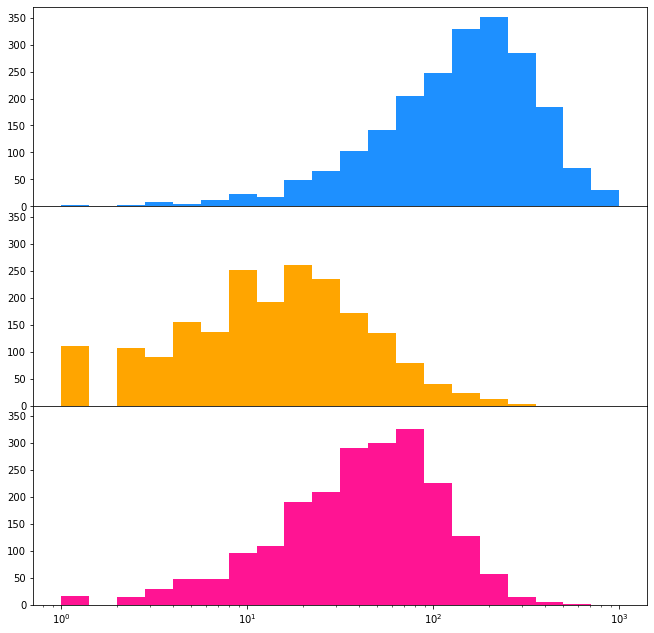

In [149]:
# 노드 웨이트 히스토그램 
bins = np.logspace(0, 3, 21)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(11, 11))
ax1.hist([d for d in all_out_weight], bins=bins, color = 'dodgerblue')
ax2.hist([d for d in on_out_weight], bins=bins, color = 'orange')
ax3.hist([d for d in off_out_weight], bins=bins, color = 'deeppink')

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

import matplotlib.ticker as ticker
ax1.set_xscale("log")

plt.show()